<a href="https://colab.research.google.com/github/cheungngo/computational_physics/blob/main/03_02_06_Famous_nonlinear_oscillators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Famous Nonlinear Oscillators

# the van der Pol oscillator

$
\frac{{d^2 x}}{{dt^2}} + \mu (x^2 - x_0^2) \frac{{dx}}{{dt}} + \omega_0^2 x = 0
$

Here's a breakdown of the terms in the equation:

- $ x(t) $: the displacement of the oscillator from its equilibrium position at time $ t $.
- $ \frac{{d^2 x}}{{dt^2}} $: the acceleration of the oscillator.
- $ \frac{{dx}}{{dt}} $: the velocity of the oscillator.
- $ \mu $: a damping parameter that represents the nonlinearity in the system.
- $ x_0 $: a constant related to the equilibrium position of the system.
- $ \omega_0 $: the natural frequency of the oscillator.

## Physical Interpretation

1. **Linear Oscillation**: The term $ \omega_0^2 x $ represents a simple harmonic motion with a natural frequency of $ \omega_0 $. This term tries to restore the system to equilibrium.

2. **Nonlinear Damping**: The term $ \mu (x^2 - x_0^2) \frac{{dx}}{{dt}} $ is a nonlinear damping term. When the displacement is less than $ x_0 $, the damping is negative (i.e., energy is added to the system), and when the displacement is greater than $ x_0 $, the damping is positive (i.e., energy is removed from the system).

3. **Nonlinear Behavior**: The nonlinear damping term leads to a rich set of dynamical behaviors, depending on the values of $ \mu $, $ \omega_0 $, and $ x_0 $. This can include limit cycles, where the system oscillates in a stable, periodic motion, or more chaotic behavior.

## Applications

- **Vacuum Tubes**: The van der Pol equation was originally derived to describe the behavior of a vacuum tube with a triode, where nonlinearities in the current-voltage relationship lead to oscillations.
- **Metronomes**: This equation can also be used to describe the synchronization behavior of coupled metronomes, where the nonlinear terms represent the coupling between different metronomes.

## Explanation to the x-dependent nonlinear damping

Consider the nonlinear damping term:

$
\mu (x^2 - x_0^2) \frac{{dx}}{{dt}}
$

Here's why this term represents a damping that depends on the displacement $ x $:

1. **Damping Effect**: Damping is a phenomenon in which energy is dissipated or removed from a system, usually due to friction or resistance. In the context of the van der Pol equation, the term involving $ \mu $ and $ \frac{{dx}}{{dt}} $ acts as a damping force.

2. **Dependence on $ x $**: The damping term is nonlinear and depends on the displacement $ x $. Specifically, it depends on the square of the displacement, $ x^2 $, and the constant $ x_0^2 $.

3. **Positive/Negative Damping**: Depending on the value of $ x $ relative to $ x_0 $, the damping term can be either positive or negative. When $ x < x_0 $, the damping is negative, meaning that it adds energy to the system and amplifies the oscillations. When $ x > x_0 $, the damping is positive, meaning that it removes energy from the system and dampens the oscillations.

4. **Nonlinear Behavior**: The dependence of the damping on $ x $ introduces nonlinearity into the system. This makes the system's behavior more complex and interesting, allowing for phenomena like limit cycles.

We can use a solver like `odeint` from the SciPy library to integrate the differential equation over time.

To reduce the second-order differential equation to a system of first-order differential equations, we'll introduce a new variable for the velocity:

$
\begin{align*}
y_0 & = x \\
y_1 & = \frac{{dx}}{{dt}}
\end{align*}
$

Then, the equations become:

$
\begin{align*}
\frac{{dy_0}}{{dt}} & = y_1 \\
\frac{{dy_1}}{{dt}} & = -\mu (y_0^2 - x_0^2) y_1 - \omega_0^2 y_0
\end{align*}
$

We'll choose some typical values for $ \mu $, $ \omega_0 $, and $ x_0 $, and then solve and plot the system.

Here's the plot of the van der Pol oscillator's behavior over time:




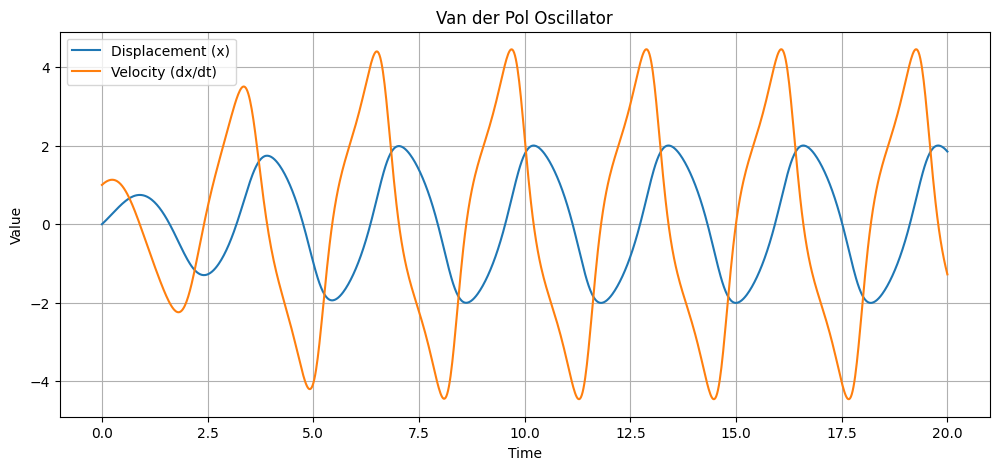

In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# Define the system of ODEs
def van_der_pol(y, t, mu, omega_0, x_0):
    y0, y1 = y
    dydt = [y1, -mu * (y0**2 - x_0**2) * y1 - omega_0**2 * y0]
    return dydt

# Parameters
mu = 1.0
omega_0 = 2.0
x_0 = 1.0

# Initial conditions (x = 0, dx/dt = 1)
y_init = [0, 1]

# Time grid
t = np.linspace(0, 20, 1000)

# Solve the differential equation
solution = odeint(van_der_pol, y_init, t, args=(mu, omega_0, x_0))

# Plot the solution
plt.figure(figsize=(12, 5))
plt.plot(t, solution[:, 0], label='Displacement (x)')
plt.plot(t, solution[:, 1], label='Velocity (dx/dt)')
plt.title('Van der Pol Oscillator')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


- The blue curve represents the displacement $ x $ of the oscillator from its equilibrium position.
- The orange curve represents the velocity $ \frac{{dx}}{{dt}} $ of the oscillator.

You can see the nonlinear behavior and the limit cycle as time progresses. The system settles into a stable oscillatory pattern after some transient behavior.

## Phase diagram for the Van der Pol Oscillator

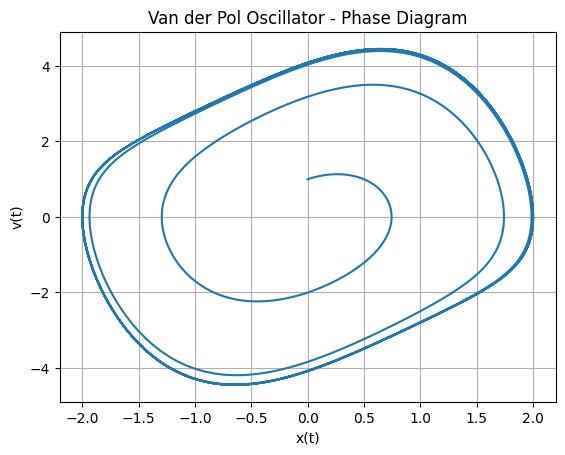

In [ ]:
plt.plot(solution[:, 0], solution[:, 1])
plt.title('Van der Pol Oscillator - Phase Diagram')
plt.xlabel('x(t)')
plt.ylabel('v(t)')
plt.grid(True)
plt.show()


The phase plot shown above represents the trajectory of the Van der Pol oscillator in its phase space (displacement $ x $ against velocity $ \frac{dx}{dt} $). Here are some observations and interpretations:

1. **Limit Cycle**: The trajectory spirals outwards from the initial condition until it reaches a closed loop, which is called a limit cycle. In the context of the Van der Pol oscillator, the limit cycle represents a stable, periodic solution to the system. Once the system reaches this loop, it continues to oscillate within it indefinitely.

2. **Nonlinear Damping**: The Van der Pol oscillator is characterized by nonlinear damping. When the displacement $ x $ is small, the system is damped (spirals inward). But as the amplitude of $ x $ grows and exceeds the value of $ x_0 $, the damping becomes negative (the system is driven), causing the trajectory to spiral outward until it reaches the limit cycle.

3. **Unique Behavior**: Unlike a simple harmonic oscillator, which would simply oscillate back and forth along a straight line in phase space, the Van der Pol oscillator exhibits a more complex behavior due to its nonlinear damping term. This is evident from the spiral trajectory in the phase space.

## Production of a limit cycle in phase space

A limit cycle in the phase space of a dynamical system refers to a closed trajectory or orbit that is isolated from other trajectories. Specifically:

1. **Closed Trajectory**: A trajectory is said to be closed if, after some finite time, the system returns to its initial state and repeats its motion. This means that the system undergoes periodic oscillations.

2. **Isolated**: The limit cycle is isolated if no trajectories in its immediate vicinity (neither inside nor outside the loop) form closed loops. Instead, trajectories that start inside the limit cycle will spiral out to meet it, and those that start outside will spiral in to meet it.

The following code is modified so that the starting point in the phase space is outside the loop formed in the previous graph.

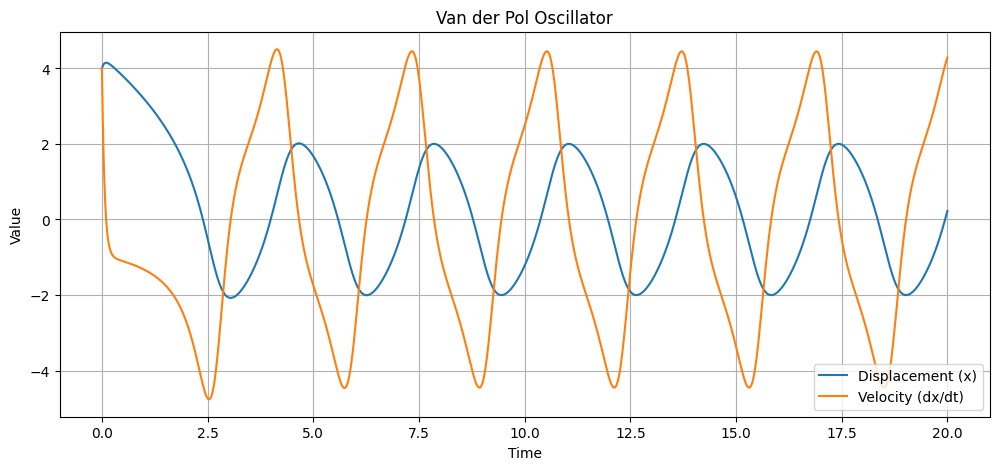

In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# Define the system of ODEs
def van_der_pol(y, t, mu, omega_0, x_0):
    y0, y1 = y
    dydt = [y1, -mu * (y0**2 - x_0**2) * y1 - omega_0**2 * y0]
    return dydt

# Parameters
mu = 1.0
omega_0 = 2.0
x_0 = 1.0

# Initial conditions # changed so that the initial position in the phase diagram is outside the loop
y_init = [4,4]

# Time grid
t = np.linspace(0, 20, 1000)

# Solve the differential equation
solution2 = odeint(van_der_pol, y_init, t, args=(mu, omega_0, x_0))

# Plot the solution
plt.figure(figsize=(12, 5))
plt.plot(t, solution2[:, 0], label='Displacement (x)')
plt.plot(t, solution2[:, 1], label='Velocity (dx/dt)')
plt.title('Van der Pol Oscillator')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


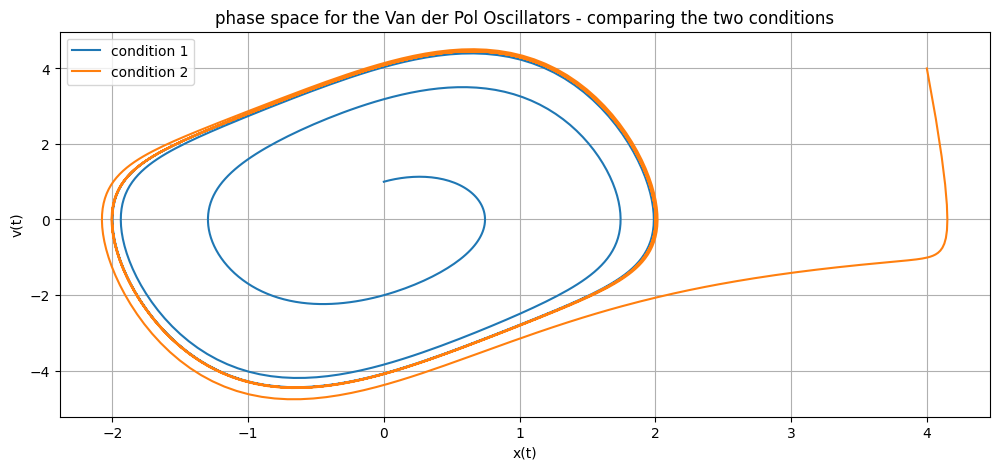

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(solution[:, 0], solution[:, 1], label = "condition 1")
plt.plot(solution2[:, 0], solution2[:, 1], label = "condition 2")
plt.title('phase space for the Van der Pol Oscillators - comparing the two conditions')
plt.xlabel('x(t)')
plt.ylabel('v(t)')
plt.legend()
plt.grid(True)
plt.show()

# Duffing Oscillator

$
\frac{d^2 x}{dt^2} = -2\gamma \frac{dx}{dt} - \alpha x - \beta x^3 + F \cos(\omega t)
$

Where:
- $ x $ is the displacement of the oscillator from its equilibrium position.
- $ \gamma $ now represents a damping coefficient, which accounts for energy lost due to friction or other dissipative processes.
- $ \alpha $ remains as the coefficient for the linear restoring force. When $ \alpha $ is positive, a displacement from the equilibrium position will result in a force trying to restore the system back to equilibrium.
- $ \beta $ is the coefficient for the nonlinear restoring force. Depending on its sign and magnitude, this non-linear force can either enhance or counteract the linear restoring force.
- $ F $ is the amplitude of an external driving force.
- $ \omega $ is the angular frequency of the external driving force.

Interpretation:

1. **Linear Restoring Force**: The term $ -\alpha x $ represents a linear restoring force. When $ \alpha $ is positive, the system tends to restore itself to the equilibrium position when displaced.

2. **Nonlinear Restoring Force**: The term $ -\beta x^3 $ introduces nonlinearity. This means that as the displacement increases, the force doesn't just scale linearly. Depending on the sign and magnitude of $ \beta $, this non-linear force can either enhance or counteract the linear restoring force.

3. **Damping**: The term $ -2\gamma \frac{dx}{dt} $ is a damping term, representing resistive forces like friction. This force is proportional to the velocity and opposes the motion, causing the system to lose energy over time.

4. **External Driving Force**: The $ F \cos(\omega t) $ term represents an external periodic driving force acting on the system. This force can drive the system into resonance under certain conditions.

Below shows a duffing oscillator:

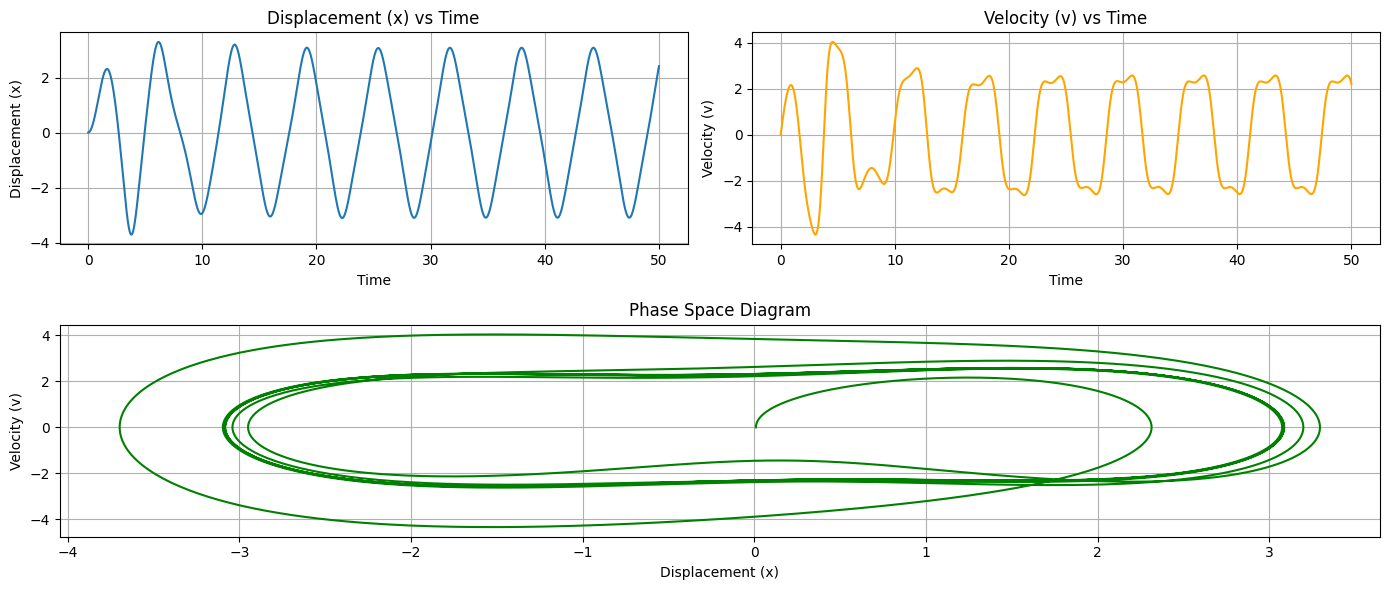

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the system of ODEs for the Duffing oscillator
def duffing_system(y, t, alpha, beta, gamma, F, omega):
    x, v = y
    dxdt = v
    dvdt = -2 * gamma * v - alpha * x - beta * x**3 + F * np.cos(omega * t)
    return [dxdt, dvdt]

# Default parameters
alpha = 1.0
beta = 0.2
gamma = 0.2
omega = 1.0
F = 4.0

# Initial conditions
y_init = [0.009, 0.0]

# Time grid
t = np.linspace(0, 50, 5000)

# Solve the differential equation
solution = odeint(duffing_system, y_init, t, args=(alpha, beta, gamma, F, omega))
x_solution = solution[:, 0]
v_solution = solution[:, 1]

# Plotting the solutions for x(t) and v(t)

plt.figure(figsize=(14, 6))

# Displacement x(t) over time
plt.subplot(2, 2, 1)
plt.plot(t, x_solution, label='Displacement (x)')
plt.title('Displacement (x) vs Time')
plt.xlabel('Time')
plt.ylabel('Displacement (x)')
plt.grid(True)

# Velocity v(t) over time
plt.subplot(2, 2, 2)
plt.plot(t, v_solution, label='Velocity (v)', color='orange')
plt.title('Velocity (v) vs Time')
plt.xlabel('Time')
plt.ylabel('Velocity (v)')
plt.grid(True)

# Phase space diagram
plt.subplot(2, 1, 2)
plt.plot(x_solution, v_solution, label='Phase Trajectory', color='green')
plt.title('Phase Space Diagram')
plt.xlabel('Displacement (x)')
plt.ylabel('Velocity (v)')
plt.grid(True)

plt.tight_layout()
plt.show()


## Period-three solution in a Duffing Oscillator

A period-three solution in a dynamical system refers to a behavior in which the system returns to its initial state after three cycles, but not before. In other words, if you were to plot the trajectory of the system in phase space (displacement vs. velocity in this case), you'd observe a pattern that repeats every three cycles.

To identify a period-three solution, we can look for repeating patterns in the solution data. Specifically, if $ x(t) $ has a period-three solution, then the value of $ x(t) $ should be approximately the same at times $ t, t + T, t + 2T, \ldots $, where $ T $ is the period of the oscillation.

parameter used: $ α = 0.0,β = 1., γ = 0.04, ω = 1.,F = 0.2 $

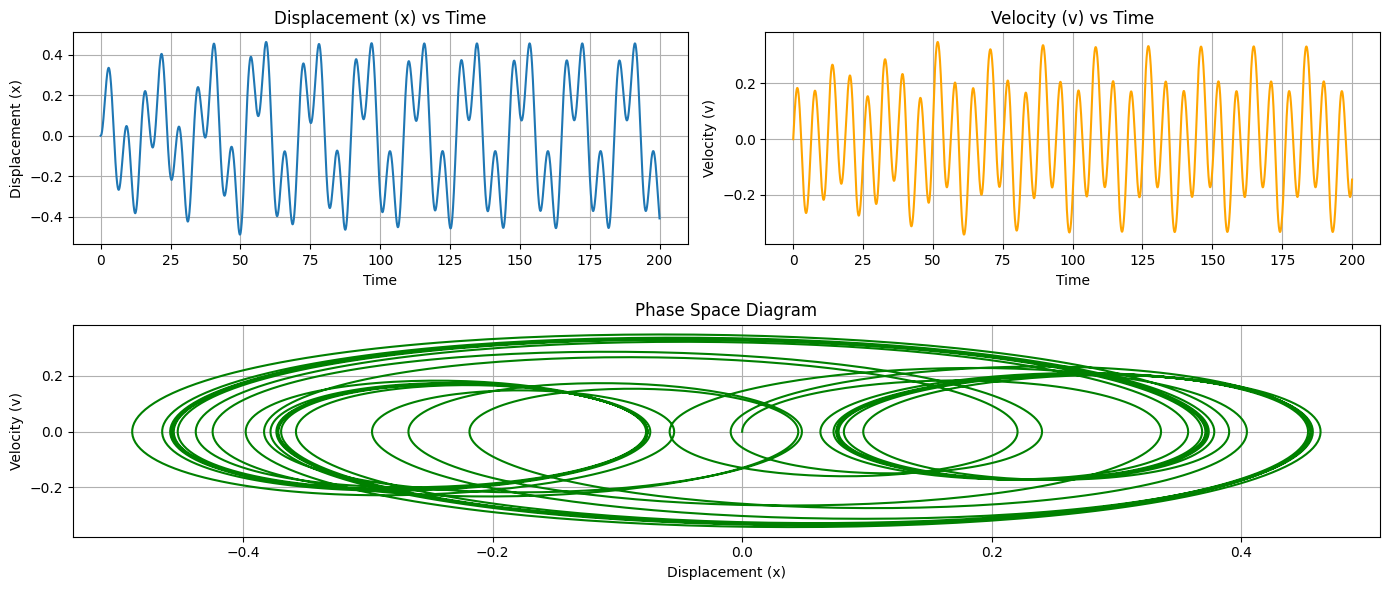

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the system of ODEs for the Duffing oscillator
def duffing_system(y, t, alpha, beta, gamma, F, omega):
    x, v = y
    dxdt = v
    dvdt = -2 * gamma * v - alpha * x - beta * x**3 + F * np.cos(omega * t)
    return [dxdt, dvdt]

# Default parameters
alpha = 0
beta = 1
gamma = 0.04
omega = 1.0
F = 0.2

# Initial conditions
y_init = [0, 0.0]

# Time grid
t = np.linspace(0, 200, 5000)

# Solve the differential equation
solution = odeint(duffing_system, y_init, t, args=(alpha, beta, gamma, F, omega))
x_solution = solution[:, 0]
v_solution = solution[:, 1]

# Plotting the solutions for x(t) and v(t)

plt.figure(figsize=(14, 6))

# Displacement x(t) over time
plt.subplot(2, 2, 1)
plt.plot(t, x_solution, label='Displacement (x)')
plt.title('Displacement (x) vs Time')
plt.xlabel('Time')
plt.ylabel('Displacement (x)')
plt.grid(True)

# Velocity v(t) over time
plt.subplot(2, 2, 2)
plt.plot(t, v_solution, label='Velocity (v)', color='orange')
plt.title('Velocity (v) vs Time')
plt.xlabel('Time')
plt.ylabel('Velocity (v)')
plt.grid(True)

# Phase space diagram
plt.subplot(2, 1, 2)
plt.plot(x_solution, v_solution, label='Phase Trajectory', color='green')
plt.title('Phase Space Diagram')
plt.xlabel('Displacement (x)')
plt.ylabel('Velocity (v)')
plt.grid(True)

plt.tight_layout()
plt.show()


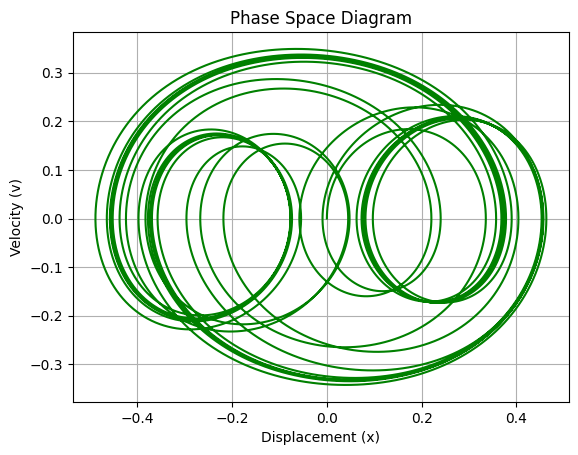

In [ ]:
plt.plot(x_solution, v_solution, label='Phase Trajectory', color='green')
plt.title('Phase Space Diagram')
plt.xlabel('Displacement (x)')
plt.ylabel('Velocity (v)')
plt.grid(True)
plt.show()

## The Ueda Oscillator

- "Chaos" refers to unpredictable behavior; when combined with "deterministic," it pertains to specific chaotic phenomena with distinct laws, math, and physical origins.
- Deterministic chaos isn't based on randomness but on extreme sensitivity to initial conditions.
- Chaotic behavior is observed in diverse systems: weather, biology, electronics, mechanics like pendulums.
- Using chaotic systems instead of randomness (PRNGs) is explored in various fields with promising outcomes.
- Research combines deterministic chaos and pseudorandom number generation, discussing ultra-weak coupling of dimensional dynamical systems.
- Investigation of the logistic map as a pseudorandom number generator is conducted and compared with contemporary methods.
- Algorithms like "couple map lattice based on discrete chaotic iteration" are proposed for pseudorandom number generation, tested for NIST 800-22 tests and image encryption.
- Authors design a random bit generator (CCCBG) using cross-coupled chaotic systems and propose a binary stream-cipher algorithm based on one-dimensional chaotic maps.
- Multiple studies delve into similar topics, exploring properties of chaotic systems and their applications in randomness generation and encryption.

Actually, setting alpha = 0, large F, and gamma near *0* may produce a chaotic Ueda Oscillator

reference:
Šenkeřík, R., Pluhacek, M., Davendra, D., Zelinka, I., & Oplatková, Z.K. (2015). Simulation Of Time-Continuous Chaotic UEDA Oscillator As The Generator Of Random Numbers For Heuristic. European Conference on Modelling and Simulation.

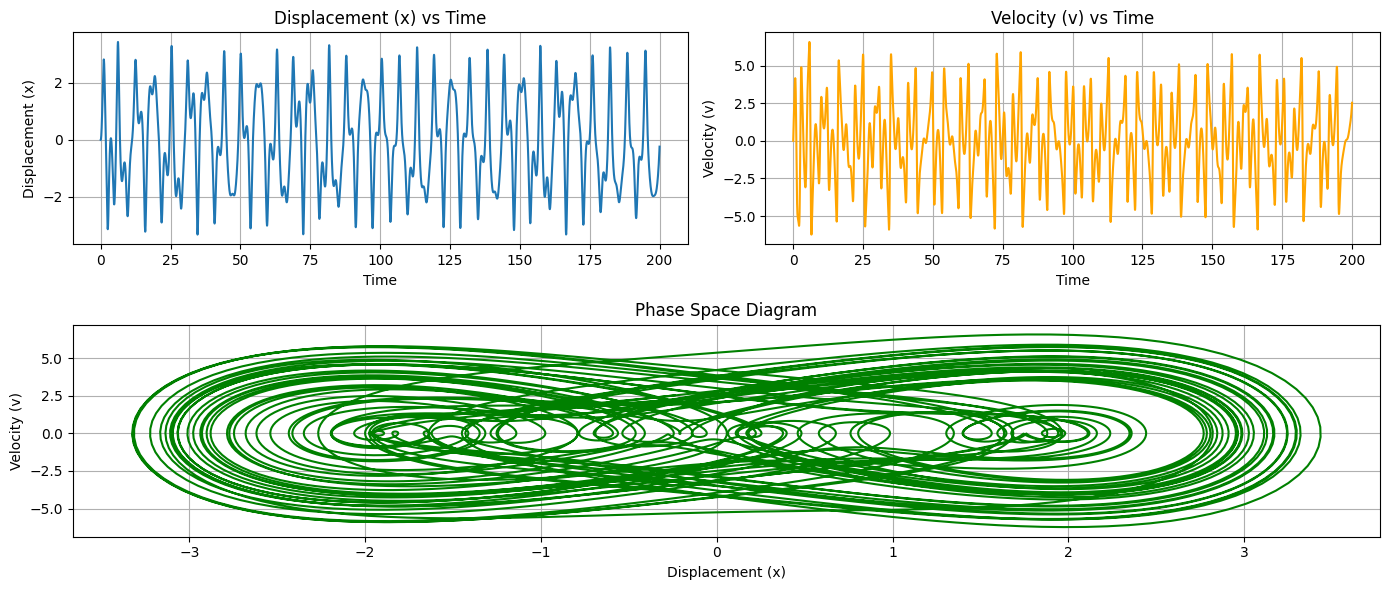

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


# Define the system of ODEs for the Duffing oscillator
def duffing_system(y, t, alpha, beta, gamma, F, omega):
    x, v = y
    dxdt = v
    dvdt = -2 * gamma * v - alpha * x - beta * x**3 + F * np.cos(omega * t)
    return [dxdt, dvdt]

# Default parameters
alpha = 0
beta = 1
gamma = 0.05
omega = 1.0
F = 7.5

# Initial conditions
y_init = [0.000, 0.0]

# Time grid
t = np.linspace(0, 200, 10000)

# Solve the differential equation
solution = odeint(duffing_system, y_init, t, args=(alpha, beta, gamma, F, omega))
x_solution = solution[:, 0]
v_solution = solution[:, 1]

# Plotting the solutions for x(t) and v(t)

plt.figure(figsize=(14, 6))

# Displacement x(t) over time
plt.subplot(2, 2, 1)
plt.plot(t, x_solution, label='Displacement (x)')
plt.title('Displacement (x) vs Time')
plt.xlabel('Time')
plt.ylabel('Displacement (x)')
plt.grid(True)

# Velocity v(t) over time
plt.subplot(2, 2, 2)
plt.plot(t, v_solution, label='Velocity (v)', color='orange')
plt.title('Velocity (v) vs Time')
plt.xlabel('Time')
plt.ylabel('Velocity (v)')
plt.grid(True)

# Phase space diagram
plt.subplot(2, 1, 2)
plt.plot(x_solution, v_solution, label='Phase Trajectory', color='green')
plt.title('Phase Space Diagram')
plt.xlabel('Displacement (x)')
plt.ylabel('Velocity (v)')
plt.grid(True)

plt.tight_layout()
plt.show()



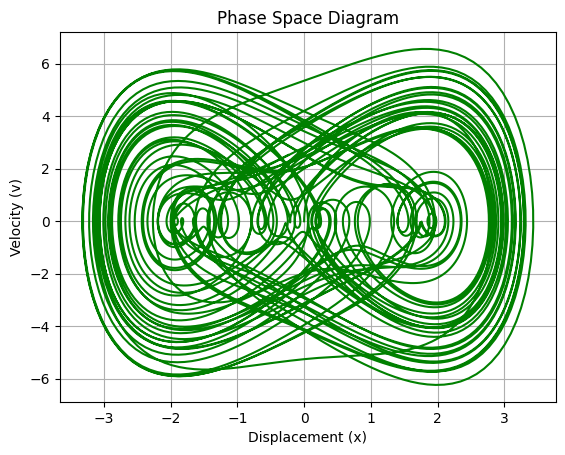

In [ ]:
# Phase space diagram

plt.plot(x_solution, v_solution, label='Phase Trajectory', color='green')
plt.title('Phase Space Diagram')
plt.xlabel('Displacement (x)')
plt.ylabel('Velocity (v)')
plt.grid(True)
plt.show()

## Duffing in another form


The given system is:

$
\begin{align*}
\dot{q} &= p \\
\dot{p} &= q - q^3 - p
\end{align*}
$

The system eventually spirals into a stable limit cycle in the phase space. This is a typical behavior for damped nonlinear oscillators.

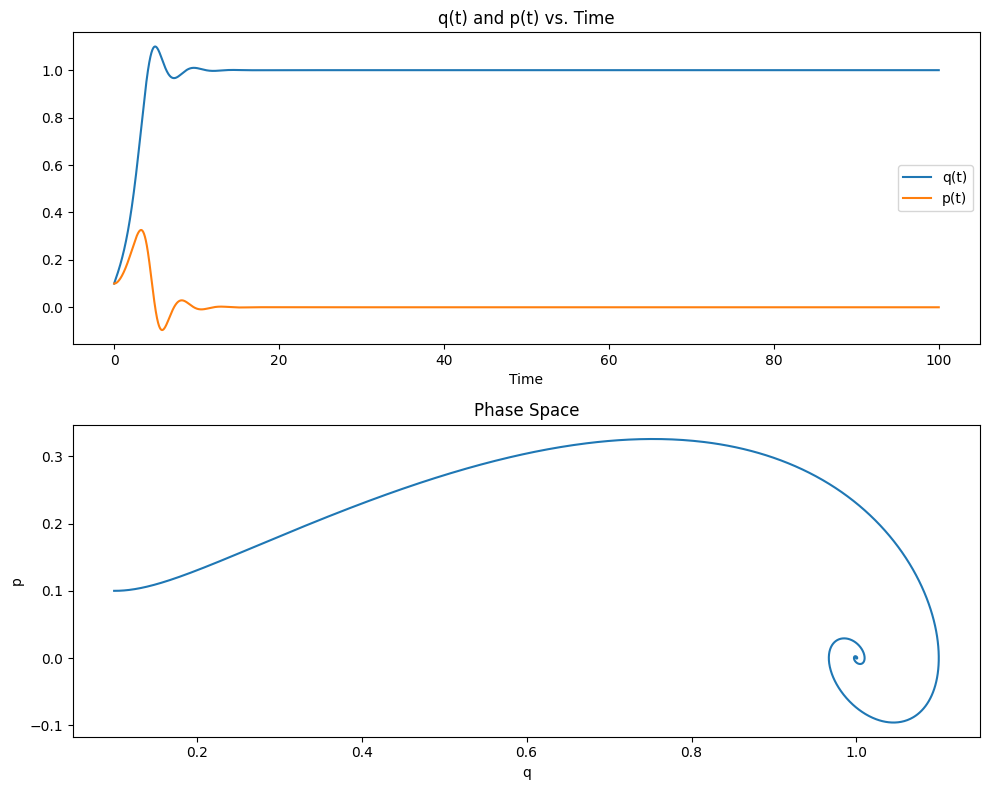

In [41]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the system of ODEs
def system(y, t):
    q, p = y
    dqdt = p
    dpdt = q - q**3 - p
    return [dqdt, dpdt]

# Initial conditions: [q0, p0]
y0 = [0.1, 0.1]

# Time array
t = np.linspace(0, 100, 10000)

# Solve ODE
solution = odeint(system, y0, t)

# Plot
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# q(t) and p(t) vs. t
axs[0].plot(t, solution[:, 0], label='q(t)')
axs[0].plot(t, solution[:, 1], label='p(t)')
axs[0].legend()
axs[0].set_xlabel('Time')
axs[0].set_title('q(t) and p(t) vs. Time')

# Phase space: q vs. p
axs[1].plot(solution[:, 0], solution[:, 1], label='Phase space trajectory')
axs[1].set_xlabel('q')
axs[1].set_ylabel('p')
axs[1].set_title('Phase Space')

plt.tight_layout()
plt.show()


## the Liapunov coefficients and the critical points

To determine the stability of the critical points of the system

$
\begin{align*}
\dot{q} &= p \\
\dot{p} &= q - q^3 - p
\end{align*}
$

we'll first find the critical points (also known as equilibrium points) by setting $ \dot{q} $ and $ \dot{p} $ to zero and solving for $ q $ and $ p $.

Critical Points:
$
\begin{align*}
p &= 0 \\
q - q^3 - p &= 0
\end{align*}
$

Next, we'll linearize the system around these critical points using the Jacobian matrix:

$
J = \begin{bmatrix}
\frac{\partial \dot{q}}{\partial q} & \frac{\partial \dot{q}}{\partial p} \\
\frac{\partial \dot{p}}{\partial q} & \frac{\partial \dot{p}}{\partial p}
\end{bmatrix}
$

where:
$
\begin{align*}
\frac{\partial \dot{q}}{\partial q} &= 0 \\
\frac{\partial \dot{q}}{\partial p} &= 1 \\
\frac{\partial \dot{p}}{\partial q} &= 1 - 3q^2 \\
\frac{\partial \dot{p}}{\partial p} &= -1
\end{align*}
$

Thus, the Jacobian matrix is:

$
J = \begin{bmatrix}
0 & 1 \\
1 - 3q^2 & -1
\end{bmatrix}
$

We'll then evaluate the eigenvalues of the Jacobian at each critical point. The nature of the eigenvalues will determine the stability and type of each critical point.

Let's first find the critical points and then evaluate the Jacobian's eigenvalues at each point.



In [42]:
from sympy import symbols, Eq, solve, Matrix

# Define variables
q, p = symbols('q p')

# Equations for critical points
eq1 = Eq(p, 0)
eq2 = Eq(q - q**3 - p, 0)

# Solve for critical points
critical_points = solve((eq1, eq2), (q, p))

# Jacobian matrix
J = Matrix([[0, 1], [1 - 3*q**2, -1]])

# Calculate eigenvalues for each critical point
eigenvalues = {}
for point in critical_points:
    J_eval = J.subs({q: point[0], p: point[1]})
    eigenvalues[point] = J_eval.eigenvals()

critical_points, eigenvalues


([(-1, 0), (0, 0), (1, 0)],
 {(-1, 0): {-1/2 - sqrt(7)*I/2: 1, -1/2 + sqrt(7)*I/2: 1},
  (0, 0): {-sqrt(5)/2 - 1/2: 1, -1/2 + sqrt(5)/2: 1},
  (1, 0): {-1/2 - sqrt(7)*I/2: 1, -1/2 + sqrt(7)*I/2: 1}})

We have three critical points for the system:

1. $ (-1, 0) $
2. $ (0, 0) $
3. $ (1, 0) $

Analyzing the eigenvalues at each critical point:

1. At $ (-1, 0) $:
   - The eigenvalues are complex with negative real parts: $-\frac{1}{2} \pm \frac{\sqrt{7}i}{2}$. This indicates a stable spiral.

2. At $ (0, 0) $:
   - The eigenvalues are real and of opposite signs: $-\frac{1}{2} \pm \frac{\sqrt{5}}{2}$. This indicates a saddle point (unstable).

3. At $ (1, 0) $:
   - The eigenvalues are complex with negative real parts: $-\frac{1}{2} \pm \frac{\sqrt{7}i}{2}$. This also indicates a stable spiral.

In summary:
- The critical points $ (-1, 0) $ and $ (1, 0) $ are stable spirals.
- The critical point $ (0, 0) $ is a saddle point and is unstable.

### Plotting the other stable spiral (-1,0)

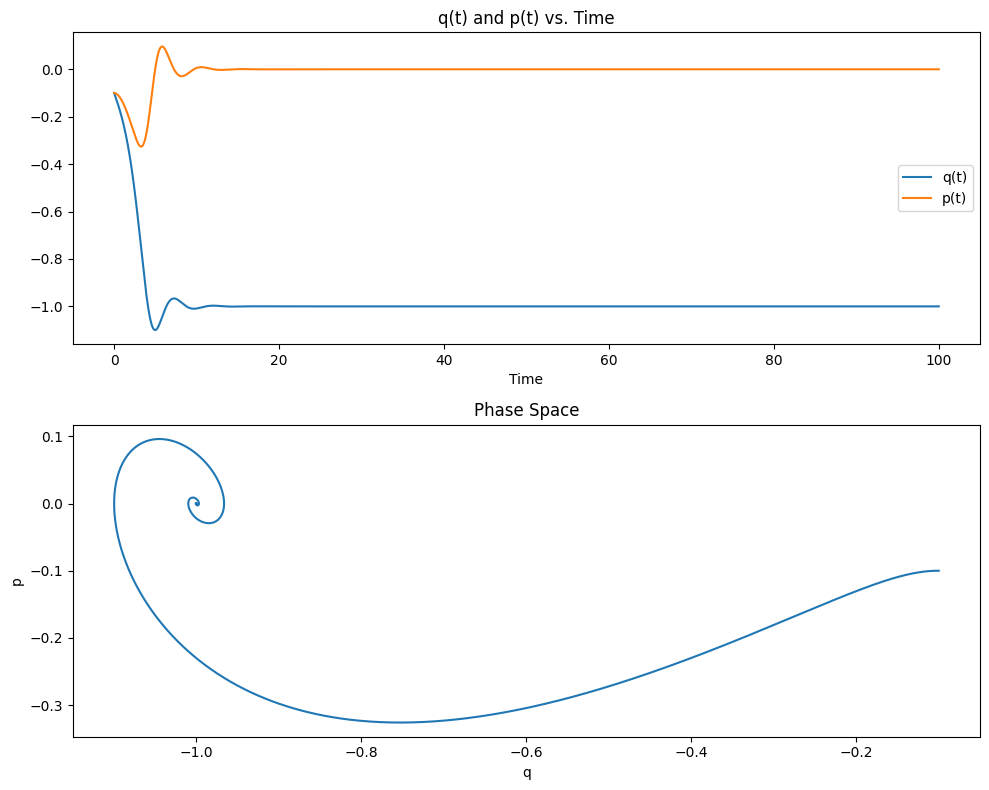

In [43]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the system of ODEs
def system(y, t):
    q, p = y
    dqdt = p
    dpdt = q - q**3 - p
    return [dqdt, dpdt]

# Initial conditions: [q0, p0]
y0 = [-0.1, -0.1]

# Time array
t = np.linspace(0, 100, 10000)

# Solve ODE
solution = odeint(system, y0, t)

# Plot
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# q(t) and p(t) vs. t
axs[0].plot(t, solution[:, 0], label='q(t)')
axs[0].plot(t, solution[:, 1], label='p(t)')
axs[0].legend()
axs[0].set_xlabel('Time')
axs[0].set_title('q(t) and p(t) vs. Time')

# Phase space: q vs. p
axs[1].plot(solution[:, 0], solution[:, 1], label='Phase space trajectory')
axs[1].set_xlabel('q')
axs[1].set_ylabel('p')
axs[1].set_title('Phase Space')

plt.tight_layout()
plt.show()


# Rössler attractor

$
\begin{align*}
\dot{x} &= -y - z \\
\dot{y} &= x + ay \\
\dot{z} &= b + xz - cz
\end{align*}
$

where $a = 0.2$, $b = 0.2$, and $c = 5.7$.



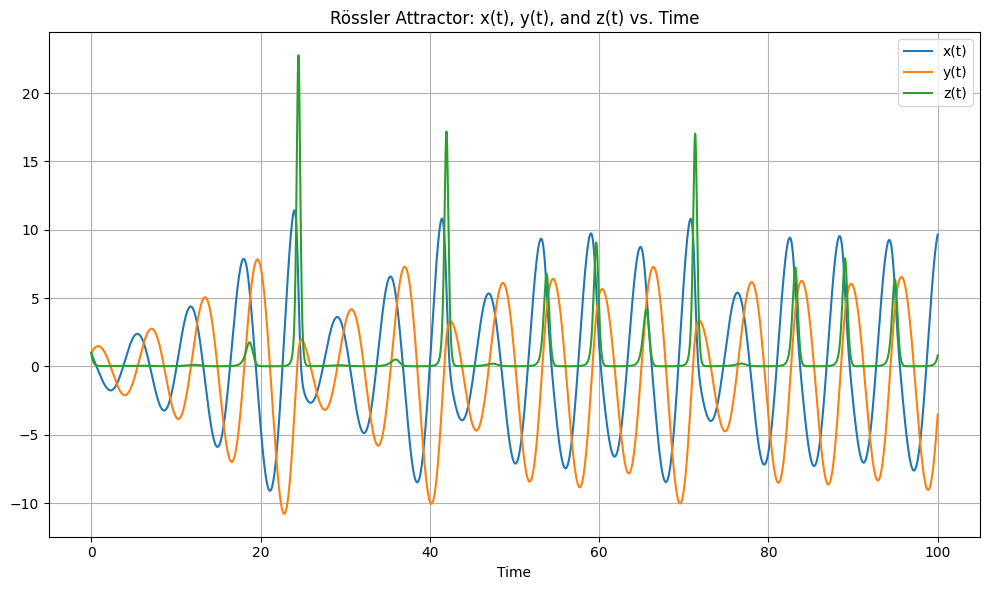

In [44]:
# Define the Rössler system
def rossler(y, t, a, b, c):
    x, y, z = y
    dxdt = -y - z
    dydt = x + a*y
    dzdt = b + x*z - c*z
    return [dxdt, dydt, dzdt]

# Parameters
a = 0.2
b = 0.2
c = 5.7

# Initial conditions: [x0, y0, z0]
y0 = [1.0, 1.0, 1.0]

# Time array
t = np.linspace(0, 100, 10000)

# Solve ODE
solution = odeint(rossler, y0, t, args=(a, b, c))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(t, solution[:, 0], label='x(t)')
plt.plot(t, solution[:, 1], label='y(t)')
plt.plot(t, solution[:, 2], label='z(t)')
plt.legend()
plt.xlabel('Time')
plt.title('Rössler Attractor: x(t), y(t), and z(t) vs. Time')
plt.grid(True)
plt.tight_layout()
plt.show()


Here's the plot showing $x(t)$, $y(t)$, and $z(t)$ as functions of time for the Rössler attractor. The system exhibits complex, chaotic behavior, which is characteristic of the Rössler attractor for certain parameter values.

## Projections of the solution onto the $ y $ and $ \dot{x} $ plane

To obtain the projections:

1. For the $ (x, y) $ plane, we will simply plot $ x $ against $ y $.
2. For the $ (x, \dot{x}) $ plane, we'll plot $ x $ against its time derivative, $ \dot{x} $. Since we have the time series of $ x $ from our solution, we can numerically differentiate it to get $ \dot{x} $.




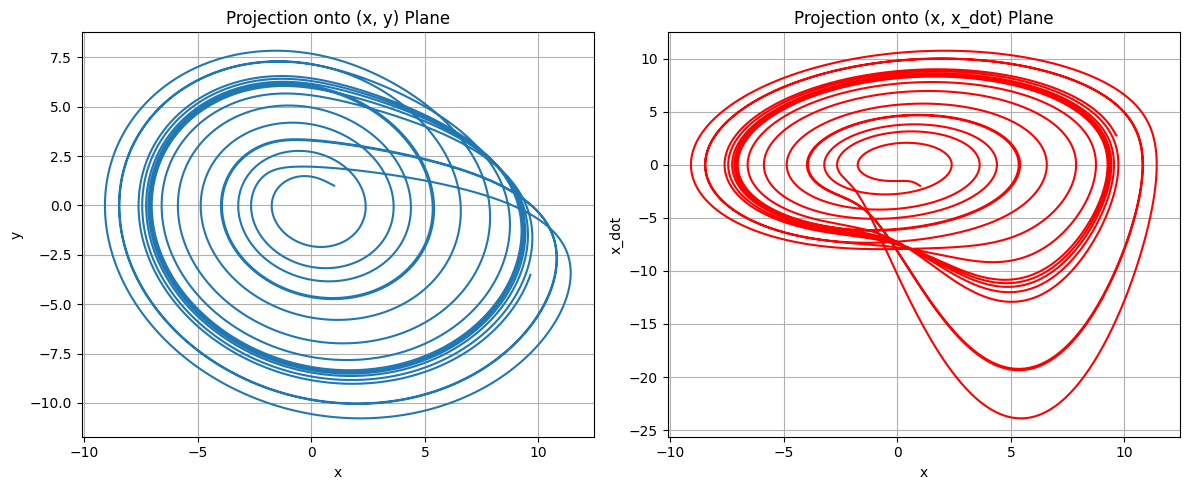

In [45]:
# Calculate x dot (dx/dt) by numerical differentiation
xdot = np.gradient(solution[:, 0], t)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# x-y plane projection
axs[0].plot(solution[:, 0], solution[:, 1], label='Projection onto x-y plane')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_title('Projection onto (x, y) Plane')
axs[0].grid(True)

# x-x_dot plane projection
axs[1].plot(solution[:, 0], xdot, label='Projection onto x-x_dot plane', color='r')
axs[1].set_xlabel('x')
axs[1].set_ylabel('x_dot')
axs[1].set_title('Projection onto (x, x_dot) Plane')
axs[1].grid(True)

plt.tight_layout()
plt.show()


1. The left plot shows the projection of the Rössler attractor onto the $ (x, y) $ plane.
2. The right plot displays the projection onto the $ (x, \dot{x}) $ plane.

Both projections offer different perspectives on the dynamics of the system, highlighting the intricate and chaotic behavior of the Rössler attractor.

## Poincaré map

To create a Poincaré map for the transverse section $ \dot{x} = 0 $, we'll look for points where the trajectory of the system crosses this section. Specifically, we're interested in the points where $ \dot{x} $ changes sign, as these are the points where $ \dot{x} $ is crossing zero.

For each crossing, we'll record the state of the system (i.e., the values of $ x $, $ y $, and $ z $).




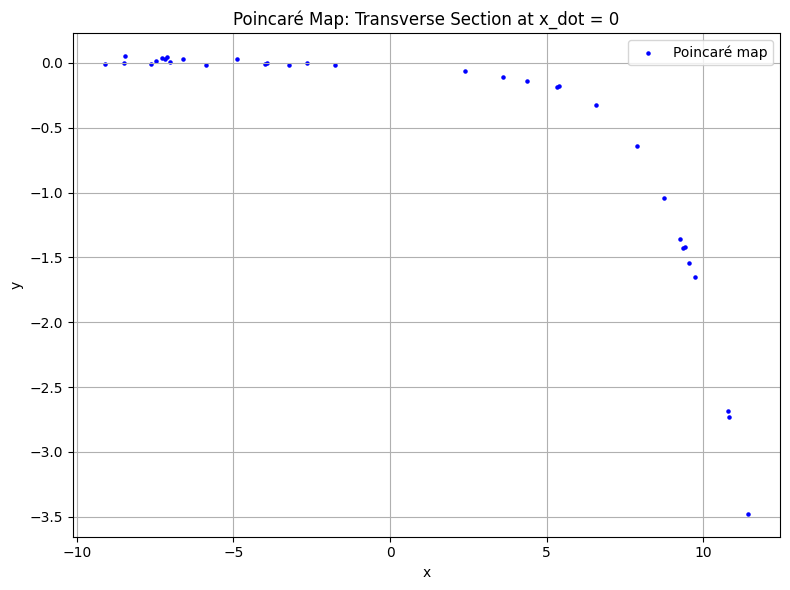

In [46]:
# Find the indices where xdot crosses zero
crossings = np.where(np.diff(np.sign(xdot)))[0]

# Extract x, y, and z values at these crossings
x_crossings = solution[crossings, 0]
y_crossings = solution[crossings, 1]
z_crossings = solution[crossings, 2]

# Plotting the Poincaré map
plt.figure(figsize=(8, 6))
plt.scatter(x_crossings, y_crossings, color='b', s=5, label='Poincaré map')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Poincaré Map: Transverse Section at x_dot = 0')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Here's the Poincaré map for the transverse section $ \dot{x} = 0 $. The plot represents the intersections of the trajectory with the plane $ \dot{x} = 0 $ in the $ (x, y) $ space.

The scattered points give insights into the periodic and chaotic nature of the Rössler attractor in this section of the phase space. The Poincaré map provides a reduced-dimension view of the system's dynamics, making certain structures and patterns more evident.

## To plot the value of the extrema $ x_{i+1} $ as a function of the previous extremum $ x_i $

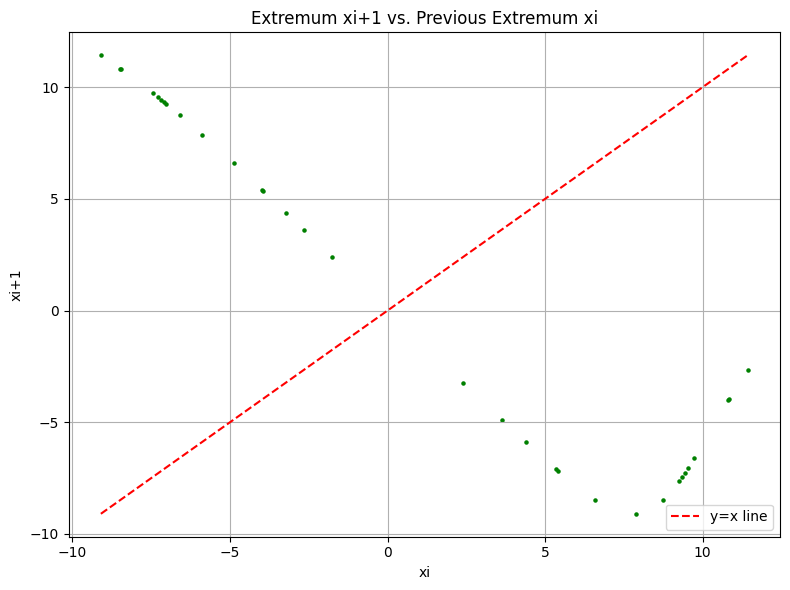

In [47]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the Rössler system
def rossler(y, t, a, b, c):
    x, y, z = y
    dxdt = -y - z
    dydt = x + a*y
    dzdt = b + x*z - c*z
    return [dxdt, dydt, dzdt]

# Parameters
a = 0.2
b = 0.2
c = 5.7

# Initial conditions: [x0, y0, z0]
y0 = [1.0, 1.0, 1.0]

# Time array
t = np.linspace(0, 100, 10000)

# Solve ODE
solution = odeint(rossler, y0, t, args=(a, b, c))

# Calculate x dot (dx/dt) by numerical differentiation
xdot = np.gradient(solution[:, 0], t)

# Find the indices where xdot crosses zero
crossings = np.where(np.diff(np.sign(xdot)))[0]

# Extract x, y, and z values at these crossings
x_crossings = solution[crossings, 0]

# Extracting xi and xi+1 values from the extrema
xi = x_crossings[:-1]
xi_plus_1 = x_crossings[1:]

# Plotting xi+1 vs xi
plt.figure(figsize=(8, 6))
plt.scatter(xi, xi_plus_1, color='g', s=5)
plt.plot([min(xi), max(xi)], [min(xi), max(xi)], 'r--', label='y=x line')
plt.xlabel('xi')
plt.ylabel('xi+1')
plt.title('Extremum xi+1 vs. Previous Extremum xi')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
